In [1]:
import grid2op
import os

In [2]:
os.chdir("../dist/")
%pip install plan4grid-0.0.2-py3-none-any.whl

Processing d:\aiplan4grid\dist\plan4grid-0.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
from plan4grid.AIPlan4GridAgent import AIPlan4GridAgent
from grid2op.Backend import PandaPowerBackend

In [4]:
env_name = "educ_case14_storage"
tactical_horizon = 1
strategic_horizon = 288
solver = "enhsp"
scenario_id = 2
time_step = 5

In [5]:
from grid2op.Chronics import FromHandlers
from grid2op.Chronics.handlers import (
    CSVHandler,
    DoNothingHandler,
    PerfectForecastHandler,
)
env = grid2op.make(
    dataset=env_name,
    data_feeding_kwargs={
        "gridvalueClass": FromHandlers,
        "gen_p_handler": CSVHandler("prod_p"),
        "load_p_handler": CSVHandler("load_p"),
        "gen_v_handler": DoNothingHandler("prod_v"),
        "load_q_handler": CSVHandler("load_q"),
        "h_forecast": [h * time_step for h in range(tactical_horizon)],
        "gen_p_for_handler": PerfectForecastHandler("prod_p_forecasted"),
        "load_p_for_handler": PerfectForecastHandler("load_p_forecasted"),
        "load_q_for_handler": PerfectForecastHandler("load_q_forecasted"),
    },
    test=True,
    backend=PandaPowerBackend(),
)

d:\AIPlan4Grid\.venv\lib\site-packages\grid2op\MakeEnv\Make.py:420: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


In [6]:
agent = AIPlan4GridAgent(
    env=env,
    scenario_id=scenario_id,
    tactical_horizon=tactical_horizon,
    solver=solver,
    debug=True,
)

In [ ]:
agent.print_summary()
agent.print_grid_properties()


* Episode 0:
	No congestion detected, doing nothing...
	Reward: 15.657416343688965

* Episode 1:
	No congestion detected, doing nothing...
	Reward: 15.738021850585938

* Episode 2:
	No congestion detected, doing nothing...
	Reward: 15.651633262634277

* Episode 3:
	No congestion detected, doing nothing...
	Reward: 15.674113273620605

* Episode 4:
	No congestion detected, doing nothing...
	Reward: 15.671775817871094

* Episode 5:
	No congestion detected, doing nothing...
	Reward: 15.667729377746582

* Episode 6:
	No congestion detected, doing nothing...
	Reward: 15.737521171569824

* Episode 7:
	No congestion detected, doing nothing...
	Reward: 15.826396942138672

* Episode 8:
	No congestion detected, doing nothing...
	Reward: 15.865304946899414

* Episode 9:
	No congestion detected, doing nothing...
	Reward: 15.943458557128906

* Episode 10:
	No congestion detected, doing nothing...
	Reward: 15.993526458740234

* Episode 11:
	No congestion detected, doing nothing...
	Reward: 15.968756

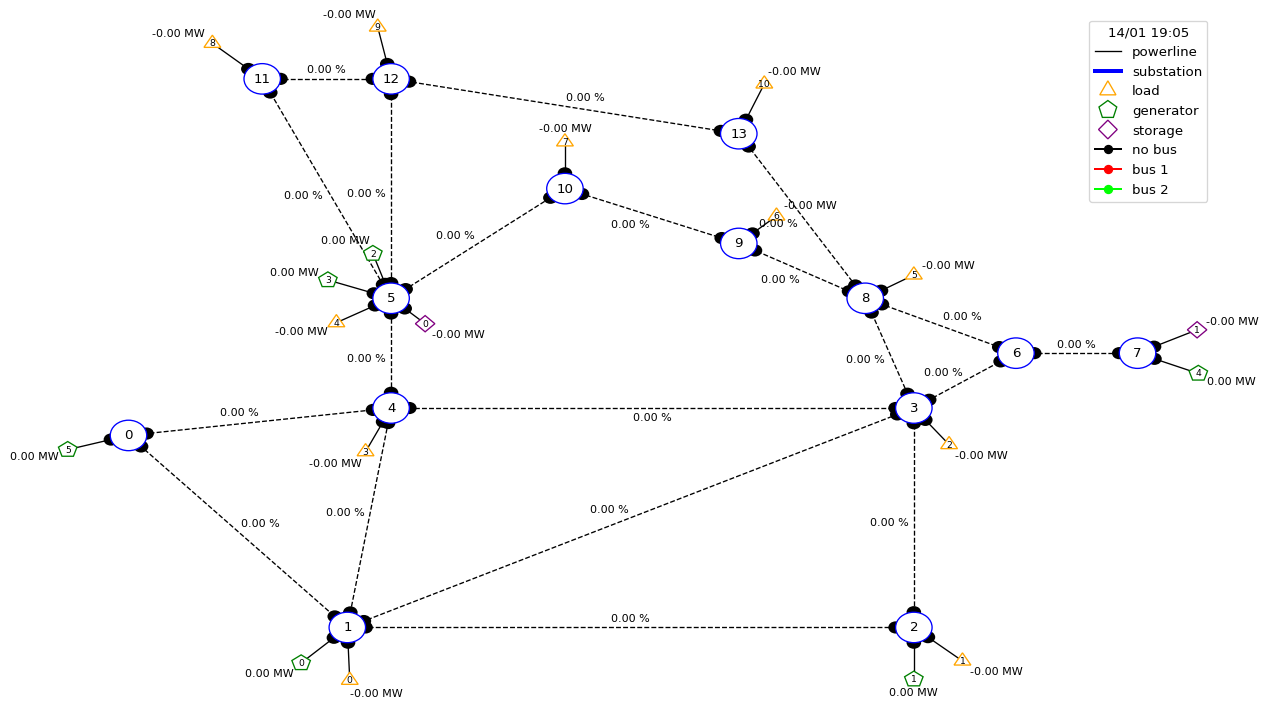


* Cumulative reward: 3512.4635610580444


In [7]:
cumulative_reward = 0
for i in range(strategic_horizon // tactical_horizon):
    print(f"\n* Episode {i}:")
    obs, reward, done, *_ = agent.progress(i)
    print(f"\tReward: {reward}")
    cumulative_reward += reward
    if done and i != (strategic_horizon // tactical_horizon - 1):
        print("The episode is done before the end of the strategic horizon!")
        break
agent.display_grid()
print(f"\n* Cumulative reward: {cumulative_reward}")